In [4]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import seaborn as sns

In [5]:
df_raw = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=932&path=url_spam.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


In [6]:
df_baking = df_raw.copy()
df_baking = df_baking.drop_duplicates()

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)

    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    text = re.sub("https","", text)

    text = re.sub("http","", text)

    return text.split()

df_baking["url"] = df_baking["url"].apply(preprocess_text)
df = df_baking.copy()
df.sample(10,random_state=2025)

,url,is_spam
1131,"[proof, com, products, proof]",False
2398,"[www, morningbrew, com, daily, stories, lulule...",False
243,"[www, politico, com, news, takeaways, biden, t...",False
1693,"[www, city, journal, org, plummeting, confiden...",False
1527,"[www, nytimes, com, business, kanye, west, yee...",False
820,"[www, gq, com, story, underground, railroad, o...",False
1380,"[ownyourcontent, wordpress, com, paul, jarvis]",False
255,"[www, sakara, com, pages, skimm, dr]",False
1114,"[austinkleon, com, learn, to, be, alone]",False
143,"[www, realclearpolitics, com, articles, media,...",False


In [7]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=2025,stratify=df['is_spam'])
df_train.shape, df_test.shape

((1895, 2), (474, 2))

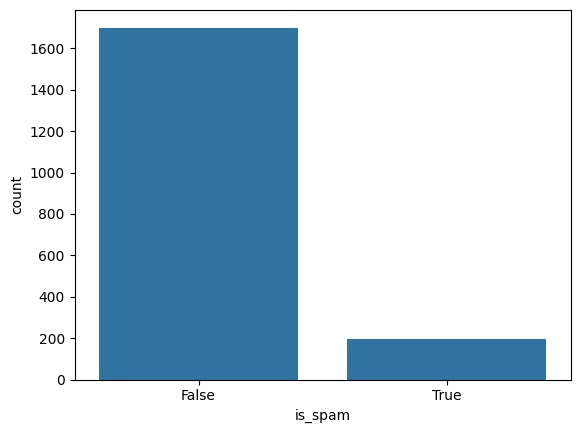

In [8]:
sns.countplot(df_train, x="is_spam")
plt.show()

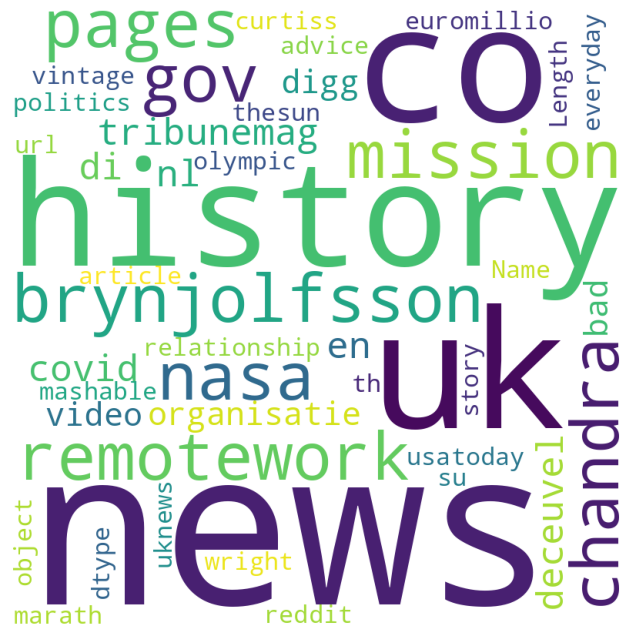

In [9]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "white", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df_train[df_train['is_spam'] == False]['url']))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

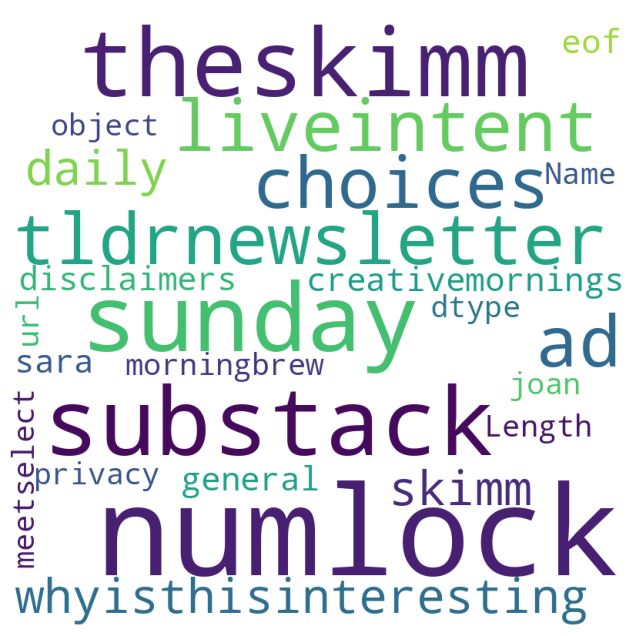

In [10]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "white", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df_train[df_train['is_spam'] == True]['url']))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [11]:
tokens_list_train = df_train["url"]
tokens_list_train = [" ".join(tokens) for tokens in tokens_list_train]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X_train = vectorizer.fit_transform(tokens_list_train).toarray()
y_train = df_train["is_spam"]

tokens_list_test = df_test["url"]
tokens_list_test = [" ".join(tokens) for tokens in tokens_list_test]

X_test = vectorizer.transform(tokens_list_train).toarray()
y_test = df_train["is_spam"]

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [12]:
model = SVC(kernel='linear', random_state=2025, class_weight='balanced')
model.fit(X_train, y_train_enc)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [13]:
y_hat = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test_enc, y_hat):.2f}')



Accuracy: 0.91


In [14]:
label_encoder.classes_
print(classification_report(y_test_enc, y_hat, target_names=["False","True"]))

              precision    recall  f1-score   support

       False       0.99      0.90      0.95      1700
        True       0.52      0.95      0.68       195

    accuracy                           0.91      1895
   macro avg       0.76      0.93      0.81      1895
weighted avg       0.95      0.91      0.92      1895



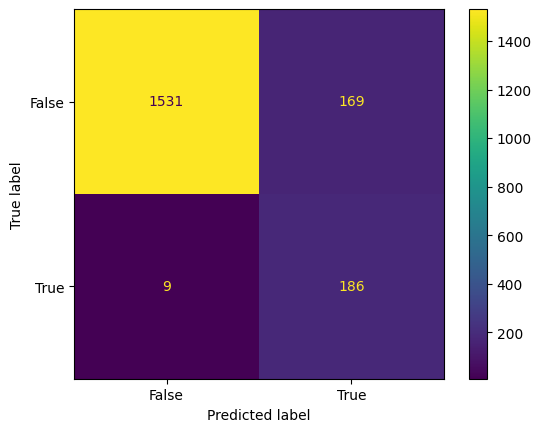

In [15]:


ConfusionMatrixDisplay.from_predictions(y_test_enc, y_hat, display_labels=label_encoder.classes_)
plt.show()

